# **<font color='blue'>Feature Engineering-6</font>**

#### Q1. Pearson correlation coefficient is a measure of the linear relationship between two variables. Suppose you have collected data on the amount of time students spend studying for an exam and their final exam scores. Calculate the Pearson correlation coefficient between these two variables and interpret the result.
****


### Answer

##### To calculate the Pearson correlation coefficient between two variables, we need to compute the covariance and the standard deviation of each variable, and then use the formula:

r = cov( x, y) / (std(x) * std(y))

where X and Y are the two variables of interest.

#### Below is example code in python to calculate correlation between time spent studying and Final Exam Score

<AxesSubplot: title={'center': 'Time studied vs Score'}, xlabel='time_studied', ylabel='score'>

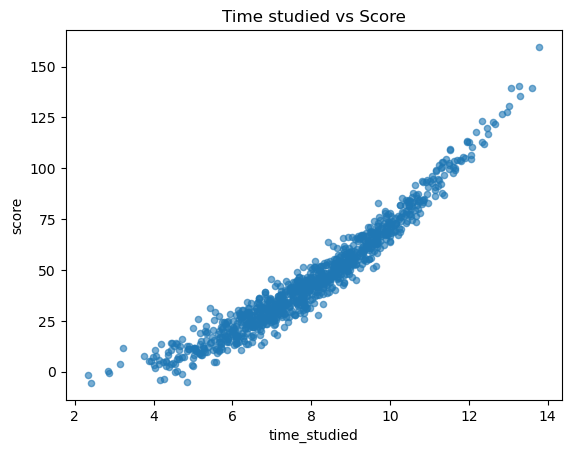

In [21]:
import numpy as np
import pandas as pd

np.random.seed(654)


n = 1000
time_studied = np.random.normal(loc=8, scale=2, size=n)
score = (time_studied**2)-3*time_studied + 2 + np.random.normal(loc=0, scale=5, size=n)

# Create dataframe
df = pd.DataFrame({'time_studied':time_studied,
                   'score':score})

cor= df.corr(method='pearson')

df.plot(kind='scatter',x='time_studied',y='score',title = 'Time studied vs Score',alpha=0.6)

#### from the above chart it is clear that there is positive correlation between time studied and final score

***
#### Q2. Spearman's rank correlation is a measure of the monotonic relationship between two variables.Suppose you have collected data on the amount of sleep individuals get each night and their overall job satisfaction level on a scale of 1 to 10. Calculate the Spearman's rank correlation between these two variables and interpret the result.
***

### Answer

To calculate the Spearman's rank correlation, you need to rank both variables separately, and then calculate the correlation between their ranks. Here's an example of how to do this with the sleep and job satisfaction data:

|sleep|job satisfaction|
|-----|----------------|
|7|6|
|8|9|
|6|5|
|4|3|
|9|10|
|8|8|
|5|4|

In [23]:
import pandas as pd
dct={'sleep':[7,8,6,4,9,8,5],
    'job satisfaction':[6,9,5,3,10,8,4]}
df=pd.DataFrame(dct)
df.corr(method='spearman')

,sleep,job satisfaction
sleep,1.000000,0.991031
job satisfaction,0.991031,1.000000


The range of Spearman's correlation coefficient is from -1 to +1, where -1 represents a perfectly negative correlation, 0 represents no correlation, and +1 represents a perfectly positive correlation.
In the case of a Spearman's correlation coefficient of 0.99, the two variables being compared have a strong tendency to move together in the same direction. However, the relationship may not be perfect, and there may be some variation or noise in the data.

***
#### Q3. Suppose you are conducting a study to examine the relationship between the number of hours of exercise per week and body mass index (BMI) in a sample of adults. You collected data on both variables for 50 participants. Calculate the Pearson correlation coefficient and the Spearman's rank correlation between these two variables and compare the results.
***

### Answer

Below is sample data generated for 50 datapoints in python between exercise hours and BMI

In [25]:
import pandas as pd
import numpy as np

#set random seed
np.random.seed(1000)

#generate sample data
n=50
exercise_hours=np.random.normal(loc=5,scale=1.5,size=n)
BMI=125/exercise_hours+np.random.normal(loc=0,scale=5,size=n)

df = pd.DataFrame({'exercise_hours':exercise_hours,
                   'BMI':BMI})


## Pearson correlation

In [26]:
pearson_corr=df.corr(method='pearson')
pearson_corr

,exercise_hours,BMI
exercise_hours,1.000000,-0.725101
BMI,-0.725101,1.000000


## Spearman's Correlation

In [27]:
spearman_corr=df.corr(method='spearman')
spearman_corr

,exercise_hours,BMI
exercise_hours,1.000000,-0.723409
BMI,-0.723409,1.000000


from above it is clear that both Spearman's Correlation and Pearson's Correlation show's strong negative Correlation between BMI and exercise time

***
#### Q4. A researcher is interested in examining the relationship between the number of hours individuals spend watching television per day and their level of physical activity. The researcher collected data on both variables from a sample of 50 participants. Calculate the Pearson correlation coefficient between these two variables.
***

### Answer

In [33]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr

np.random.seed(100)

tv_hours = np.random.normal(3, 1, 50)
physical_activity = 15/tv_hours + np.random.normal(0,1,50)

df = pd.DataFrame({'tv_hours':tv_hours,'physical_activity':physical_activity})
print(df.head())
print('\n_____________________________________________________________________\n')

# Compute the Pearson correlation coefficient and p-value
corr, pval = pearsonr(tv_hours, physical_activity)

# Print the results
print("Pearson correlation coefficient:", corr)
print("p-value:", pval)

   tv_hours  physical_activity
0  1.250235          10.809731
1  3.342680           3.937671
2  4.153036           2.671770
3  2.747564           4.631449
4  3.981321           3.876457

_____________________________________________________________________

Pearson correlation coefficient: -0.8672434110820947
p-value: 3.8042238401236463e-16


Moderate Negative Correlation found between tv_hours and phyiscal_activity
In this example, we first import the NumPy library and the pearsonr function from the SciPy library. We then set the random seed for reproducibility and generate synthetic data for the number of hours individuals spend watching television per day and their level of physical activity, using the np.random.normal() function.

Next, we use the pearsonr() function to calculate the Pearson correlation coefficient between the two variables, and store the results in the corr and pval variables. Finally, we print the results to the console.


***
#### Question 5 : A survey was conducted to examine the relationship between age and preference for a particular brand of soft drink. The survey results are shown below:

|Age(Years)|Soft Drink Preference|
|----------|---------------------|
|    25    |Coke|
| 42	|Pepsi|
| 37	|Mountain Dew|
| 19	|Coke|
| 31	|Pepsi|
| 28	|Coke|
***


### Answer

In [35]:
import pandas as pd
data = {'Age': [25, 42, 37, 19, 31, 28],
        'Soft Drink Preference': ['Coke', 'Pepsi', 'Mountain Dew', 'Coke', 'Pepsi', 'Coke']}
df = pd.DataFrame(data)

#f one way test
from scipy.stats import f_oneway
coke=df[df['Soft Drink Preference']=='Coke']['Age']
pepsi=df[df['Soft Drink Preference']=='Pepsi']['Age']
mountain_dew=df[df['Soft Drink Preference']=='Mountain Dew']['Age']

f_statistic, p_value = f_oneway(coke, pepsi, mountain_dew)
print('F-statistic:', f_statistic)
print('p-value:', p_value)

F-statistic: 3.524390243902438
p-value: 0.1631217391539759


In [36]:
# Assuming alpha value of 0.05 
alpha = 0.05
if p_value < alpha:
    print('Reject the Null Hypothesis')
    print('Conclusion : Age and Soft Drink Preference are DEPENDENT of each other')
else:
    print('FAIL to reject the Null Hypothesis')
    print('Conclusion : Age and Soft Drink Preference are INDEPENDENT of each other')

FAIL to reject the Null Hypothesis
Conclusion : Age and Soft Drink Preference are INDEPENDENT of each other


***
#### Q6. A company is interested in examining the relationship between the number of sales calls made per day and the number of sales made per week. The company collected data on both variables from a sample of 30 sales representatives. Calculate the Pearson correlation coefficient between these two variables.
***

### Answer

To calculate the Pearson correlation coefficient between the number of sales calls made per day and the number of sales made per week, we can use the pearsonr function from the scipy.stats module in Python. Here is an example code:

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import pearsonr

# Generate synthetic data
np.random.seed(1)  # for reproducibility
sales_calls = np.random.randint(50, 100, size=30)
sales_per_week = np.round(sales_calls * np.random.uniform(0.05, 0.2, size=30), decimals=0)

# Create dataframe for printing
df = pd.DataFrame({'sales_calls':sales_calls,'sales_per_week':sales_per_week})
print(df.head())

print('\n---------------------------------------------------------------------\n')

# Calculate Pearson correlation coefficient
corr_coef, p_value = pearsonr(sales_calls, sales_per_week)

print("Pearson correlation coefficient: {:.2f}".format(corr_coef))
print("p-value: {:.2f}".format(p_value))